<a href="https://colab.research.google.com/github/YonseiESC/ESC20-SPRING/blob/jay_lee/%EA%B3%BC%EC%A0%9C%20%EC%A0%9C%EC%B6%9C/week2/6%EC%A1%B0/Week2_hw_%EC%9D%B4%EC%9E%AC%EC%83%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week2 Linear Basis Regression

이재상

In [0]:
import numpy as np; np.set_printoptions(precision=3)
import pandas as pd; pd.set_option('display.precision',3)
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Exploratoy Data Analysis

오늘 준비한 데이터는 2012~2013년 타이완 부동산 거래가격 데이터입니다!

### 1) Import data

In [0]:
# Importing the dataset
 from google.colab import files

uploaded = files.upload()


Saving real.csv to real (2).csv


In [0]:
real = pd.read_csv('real.csv', index_col=0)
real.columns = ['date','house_age','dist_mrt','no_cvs','lat','long','price']
real

,date,house_age,dist_mrt,no_cvs,lat,long,price
No,,,,,,,
1,2012.917,32.0,84.879,10,24.983,121.540,37.9
2,2012.917,19.5,306.595,9,24.980,121.540,42.2
3,2013.583,13.3,561.985,5,24.987,121.544,47.3
4,2013.500,13.3,561.985,5,24.987,121.544,54.8
5,2012.833,5.0,390.568,5,24.979,121.542,43.1
...,...,...,...,...,...,...,...
410,2013.000,13.7,4082.015,0,24.942,121.504,15.4
411,2012.667,5.6,90.456,9,24.974,121.543,50.0
412,2013.250,18.8,390.970,7,24.979,121.540,40.6


### 2) Missing data

In [0]:
real.info() # No NA value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       414 non-null    float64
 1   house_age  414 non-null    float64
 2   dist_mrt   414 non-null    float64
 3   no_cvs     414 non-null    int64  
 4   lat        414 non-null    float64
 5   long       414 non-null    float64
 6   price      414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


나중에 그림 그릴거 생각해서 거래가 기준으로 짜라락 정렬하자

In [0]:
real.sort_values(by=['price'], inplace=True)
real.reset_index(inplace=True) # inplace: replace the original dataset
real = real.drop(['No'], axis=1)
real

,date,house_age,dist_mrt,no_cvs,lat,long,price
0,2013.333,14.8,393.261,6,24.962,121.538,7.6
1,2013.583,17.4,6488.021,1,24.957,121.474,11.2
2,2012.750,16.0,4066.587,0,24.943,121.503,11.6
3,2013.000,30.9,6396.283,1,24.944,121.479,12.2
4,2013.083,32.0,1156.777,0,24.949,121.530,12.8
...,...,...,...,...,...,...,...
409,2012.833,0.0,292.998,6,24.977,121.545,71.0
410,2013.417,0.0,292.998,6,24.977,121.545,73.6
411,2013.583,35.4,318.529,9,24.971,121.541,78.0
412,2013.333,37.2,186.510,9,24.977,121.543,78.3


### 3) Outlier

In [0]:
real.describe()

,date,house_age,dist_mrt,no_cvs,lat,long,price
count,414.000,414.000,414.000,414.000,414.000,414.000,414.000
mean,2013.149,17.713,1083.886,4.094,24.969,121.533,37.980
std,0.282,11.392,1262.110,2.946,0.012,0.015,13.606
min,2012.667,0.000,23.383,0.000,24.932,121.474,7.600
25%,2012.917,9.025,289.325,1.000,24.963,121.528,27.700
50%,2013.167,16.100,492.231,4.000,24.971,121.539,38.450
75%,2013.417,28.150,1454.279,6.000,24.977,121.543,46.600
max,2013.583,43.800,6488.021,10.000,25.015,121.566,117.500


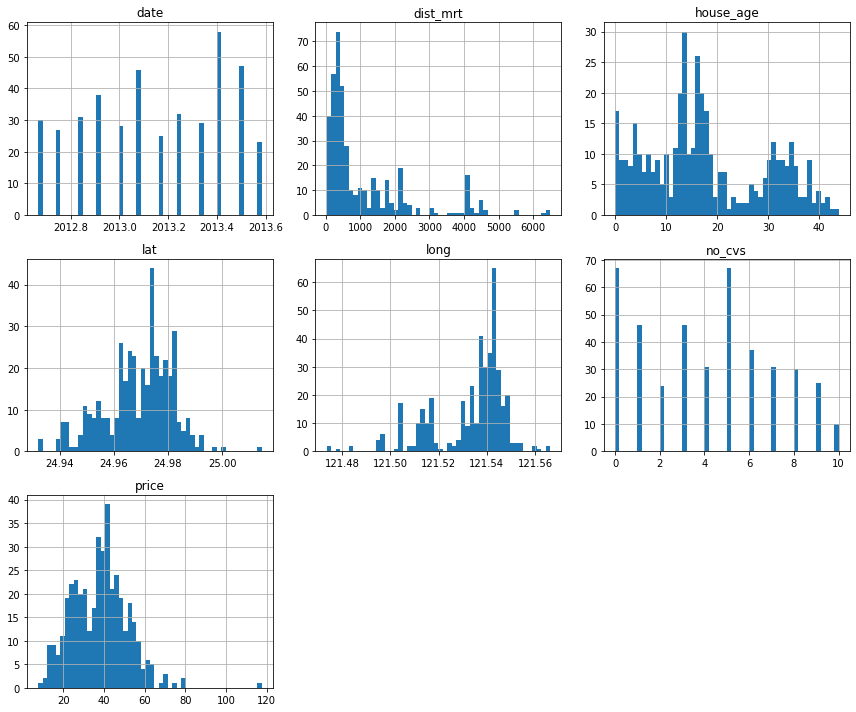

In [0]:
real.hist(bins=50, figsize=(12,10))
plt.tight_layout()

In [0]:
np.percentile(real.price, 99.5)

77.71400000000001

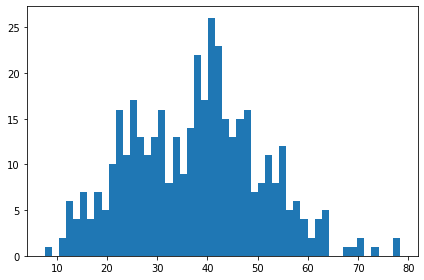

In [0]:
real = real[real.price < 80]
plt.hist(real.price, bins=50)
plt.tight_layout()

### 4) Correlation analysis

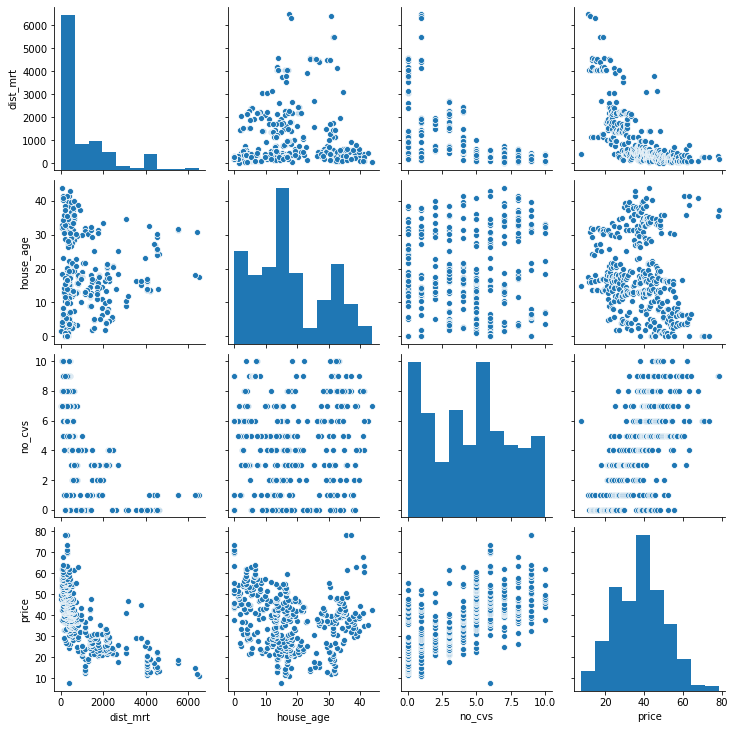

In [0]:
sns.pairplot(real[['dist_mrt', 'house_age','no_cvs','price']])




*   **지하철 역과의 거리의 분포가 상당히 skewed되고, 단위도 큽니다. 어떻게 할까요?**




사실 Linear Basis Function Model의 가정에 따르면 잔차의 분포가 종모양이기만 하면 되기 때문에 설명변수와 그 feature의 분포가 종 모양일 필요도 없으며, 단위도 어차피 나중에 표준화할 것이다. 설명변수에 변환을 취하는 경우는 만일 변환의 결과로 종속변수와의 숨겨져있던 관계(선형이든 뭐든)가 보일 때(라고 생각하지만 언제든 반론은 환영합니다)이다. 

하지만 skew의 정도가 너무 심하면 데이터의 산점도를 볼 때 직관적인 파악이 어려우며, high-dimensional 데이터의 경우도 다른 설명변수들이 종 모양일때 혼자만 skew가 되어있으면 변수끼리 비교가 힘들다. 무엇보다도 대부분의 머신러닝 알고리즘에선s feature의 표준화를 전제로 하기 때문에, 데이터 분포가 종 모양이어야 표준화가 제대로 된다. 그러니 결론은 __skew된 설명변수는 왠만하면 종모양으로 만들어주자__.

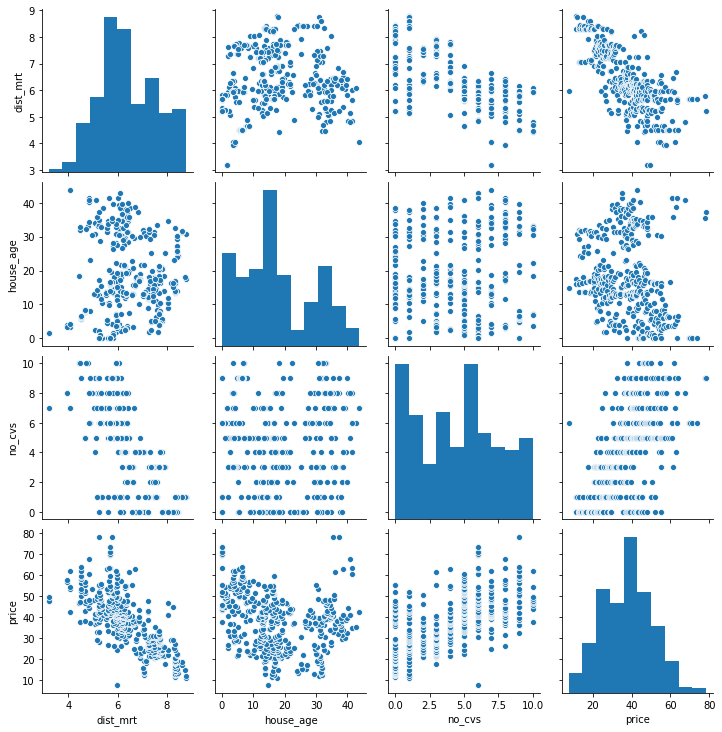

In [0]:
real2 = real.copy()
real2['dist_mrt'] = np.log(1+real.dist_mrt) # to prevent inf
sns.pairplot(real2[['dist_mrt', 'house_age','no_cvs','price']])

이 경우 dist_mist에 로그를 취했더니 이쁘게 선형 관계가 나왔다. 산점도만 보면 거래가는 거리와는 선형관계, 집 연식과는 뭔가 2차원 곡선같은 관계, 그리고 편의점 개수와는 완만한 선형관계가 보인다. 이런 인사이트를 데이터 분석으로 한번 확인해보자.

In [0]:
# https://plotly.com/python/3d-scatter-plots/
import plotly.express as px
fig = px.scatter_3d(real2, x='dist_mrt', y='no_cvs', z='house_age',
                   color='price')
fig.update_traces(marker=dict(size=6,
                              line=dict(width=2,color='DarkSlateGrey')))
fig.show()

(이런 것도 그릴 수는 있긴 있는데 어차피 High-dimensional에서는 산점도 따위 어림도 없으니 그냥 참고만 하고 넘어가자)

## 2. Feature Extraction

거래가 분석에 위도랑 경도는 저런 지도 그리는거 말고는 쓸데없다. 이제 실전 데이터 분석을 해보자. 지금부터는 train_set에 대해서만 얘기한다. 세션 주제 중 Feature Extraction을 해본다. 시각화를 위해 설명변수는 2개만 가져온다.

In [0]:
data = real2[['dist_mrt', 'house_age','price']]

### 1) Train-Test Split

그냥 sklearn에서 train_test_split쓰는게 제일 간단. 그러나 __DataFrame으로 데이터를 저장했다면 reset_index를 꼭 해줘야 함!__ 

In [0]:
#use sklearn
from sklearn.model_selection import train_test_split
X = data[['dist_mrt', 'house_age']]
Y = data['price']

# train : test = 7:3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)
Y_test.reset_index(drop=True, inplace=True)

### 2) Feature-scaling

In [0]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)

def Scl_train(sclr, df):
    colnames = df.columns
    df = sclr.transform(df)
    df = pd.DataFrame(df)
    df.set_axis(colnames, axis=1, inplace=True)
    return df

이렇게 해줘야지 나중에 scaler.transform으로 train set에 했던 스케일링을 test set에 고대로 해줄 수 있다.

In [0]:
X_train_sc = Scl_train(scaler, X_train)
X_train_sc.describe()

,dist_mrt,house_age
count,2.890e+02,2.890e+02
mean,3.119e-16,-3.073e-18
std,1.002e+00,1.002e+00
min,-2.849e+00,-1.537e+00
25%,-6.741e-01,-7.911e-01
50%,-1.580e-01,-1.152e-01
75%,8.684e-01,7.363e-01
max,2.029e+00,2.308e+00


In [0]:
X_test_sc = Scl_train(scaler, X_test)
X_test_sc.describe()

,dist_mrt,house_age
count,124.000,124.000
mean,-0.170,0.063
std,0.906,1.001
min,-2.211,-1.537
25%,-0.693,-0.668
50%,-0.241,-0.142
75%,0.523,1.122
max,2.005,1.939


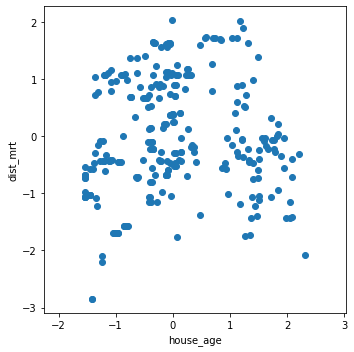

In [0]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X_train_sc.house_age, X_train_sc.dist_mrt)
ax.set_xlabel('house_age')
ax.set_ylabel('dist_mrt')
ax.axis('equal')
fig.tight_layout()

In [0]:
import plotly.express as px
fig = px.scatter_3d(x=X_train_sc.dist_mrt, y=X_train_sc.house_age, z=Y_train)
fig.update_traces(marker=dict(size=4,
                              line=dict(width=0.1,
                                        color='DarkSlateGrey')))
fig.show()

## 3. Linear Basis Model Fitting

### 1) Polynomial Basis Fitting

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [0]:
def Poly_Reg(X_train, Y_train, X_test, Y_test, m, fig=False):
    # Feature Extraction
    poly = PolynomialFeatures(degree=m)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)

    # LR Fitting
    lin = LinearRegression(fit_intercept=False)
    lin.fit(X_train_poly, Y_train)
    Y_train_pred = lin.predict(X_train_poly)
    Y_test_pred = lin.predict(X_test_poly)

    # Compue MSE
    train_MSE = np.sqrt(np.linalg.norm(Y_train - Y_train_pred)**2/Y_train.shape[0])
    test_MSE = np.sqrt(np.linalg.norm(Y_test - Y_test_pred)**2/Y_test.shape[0])

    # Visualize
    if fig is True:
        fig = px.scatter_3d(x=X_train.dist_mrt, y=X_train.house_age, z=Y_train_pred)
        fig.update_traces(marker=dict(size=4,
                                  line=dict(width=0.1,
                                            color='DarkSlateGrey')))
        fig.show()
    
    # Residual
    Resid = Y_train - Y_train_pred
    
    return {'coef':lin.coef_, 'train_MSE':train_MSE, 'test_MSE':test_MSE, 'Resid':Resid}

In [0]:
PRmodel = Poly_Reg(X_train_sc, Y_train, X_test_sc, Y_test, 2, fig=True)
PRmodel

{'Resid': 0      -1.706
 1      -6.210
 2      25.564
 3      10.749
 4       1.626
         ...  
 284    -6.930
 285    -0.916
 286   -12.931
 287    -4.881
 288     3.706
 Name: price, Length: 289, dtype: float64,
 'coef': array([36.557, -8.486, -3.106, -1.695,  0.099,  2.298]),
 'test_MSE': 8.28342086222719,
 'train_MSE': 7.670510600027705}

Residual을 한번 그려보자. 어디까지나 이렇게 산점도를 그릴 수 있는거는 2d~3d에서나 가능한거다. High-dimension에서는 우리의 예측의 함수 형태를 알 수 없다.

In [0]:
fig = px.scatter_3d(x=X_train_sc.dist_mrt, y=X_train_sc.house_age, z=PRmodel['Resid'])
fig.update_traces(marker=dict(size=4,
                                  line=dict(width=0.1,
                                            color='DarkSlateGrey')))
fig.show()

모델 Complexity에 따른 Test MSE를 보면, 1차에서 2차로 가는게 큰 메릿이 없어보인다.

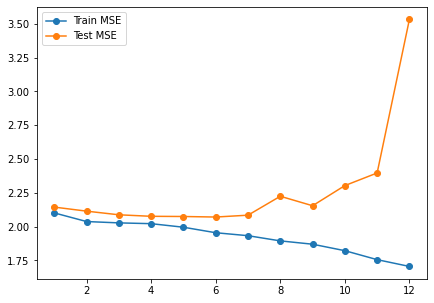

In [0]:
output = pd.DataFrame(columns=['d','Train MSE','Test MSE'])
for i in np.arange(12):
    m = i+1
    Reg = Poly_Reg(X_train_sc, Y_train, X_test_sc, Y_test, m, fig=False)
    output.loc[i] = [m, Reg['train_MSE'], Reg['test_MSE']]


fig, ax = plt.subplots(figsize=(7,5))
ax.plot(output['d'], np.log(output['Train MSE']), 'o-', label='Train MSE')
ax.plot(output['d'], np.log(output['Test MSE']), 'o-', label='Test MSE')

ax.legend()

 ## 4. Regularization

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [0]:
poly = PolynomialFeatures(degree=2)
Phi_train = poly.fit_transform(X_train_sc)
Phi_test = poly.fit_transform(X_test_sc)
print(Phi_train.shape)
print(Phi_test.shape)

(289, 6)
(124, 6)


### 1) Ridge Regression

Ridge와 Lasso 모두 sklearn에서 사용하는 방법은 LinearRegression()과 똑같다. 함수를 객체로 불러오고, 람다 계수 정해주고, 그 다음 train set 피팅해서 학습하고 결과는 .coef_로 보고, .predict(테스트 셋) 해서 예측하고.

In [0]:
from sklearn.linear_model import Ridge
alphas=np.logspace(-6, 6, 500)

In [0]:
def Ridge_Reg(Phi_train, Y_train, Phi_test, Y_test, alphas, fig=False):
    
    ## How to Ridge?##
    #1. Call Ridge function as an object
    reg = Ridge()
    
    coefs = []
    train_MSE = []
    test_MSE = []
    
    for a in alphas:
        #2. Choose your lambda (Regularization coefficient)
        reg.set_params(alpha=a)
        
        #3. Fit your model
        reg.fit(Phi_train, Y_train)
        
        #4 view result with reg.coef_, reg.predict, ...
        coefs.append(reg.coef_)
    
        train_pred = reg.predict(Phi_train)
        train_MSE.append(mean_squared_error(Y_train, train_pred))
    
        test_pred = reg.predict(Phi_test)
        test_MSE.append(mean_squared_error(Y_test, test_pred))
   
    ## just for plotting purpose.. trivial ##
    #print(np.array(coefs).shape)
    
    if fig==True:
        fig = plt.figure(figsize=(14,6))

        ax1 = fig.add_subplot(121)
        labels = ['X%d'%i for i in range(Phi_train.shape[1])]
        for i in range(Phi_train.shape[1]):
            ax1.plot(alphas, np.array(coefs)[:,i], label=labels[i])
        ax1.set_xscale('log')
        ax1.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        ax1.legend()

        ax2 = fig.add_subplot(122)
        ax2.plot(alphas, train_MSE, label='Train MSE')
        ax2.plot(alphas, test_MSE, label='Test MSE')
        ax2.set_xscale('log')
        ax2.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        alpha = np.around(alphas[np.argmin(test_MSE)],3)
        ax2.text(alphas[np.argmin(test_MSE)], np.amin(test_MSE), 'alpha={0}'.format(alpha), size=15)
        ax2.legend()

        print("Weight:" ,coefs[np.argmin(test_MSE)])
        
    return {'coefs': coefs, 'train_MSE': train_MSE, 'test_MSE': test_MSE}

Weight: [ 0.    -8.486 -3.106 -1.695  0.099  2.298]


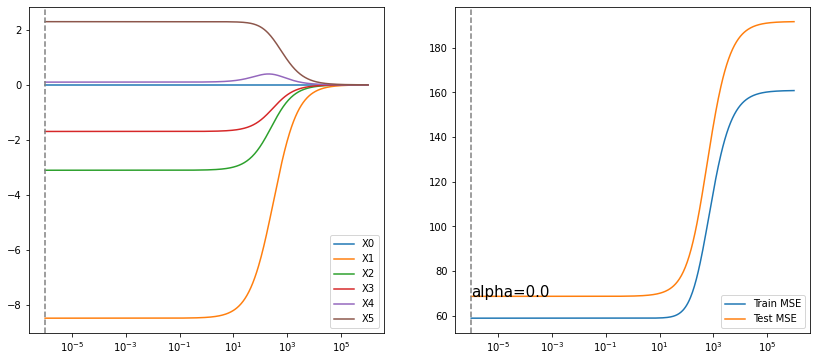

In [0]:
Ridge_output = Ridge_Reg(Phi_train, Y_train, Phi_test, Y_test, alphas, fig=True)


어 왜 intercept 포함해요? 굉장히 좋은 질문이다. Ridge와 Lasso를 할 때 intercept까지 peanalize할지 말지를 결정해야하는데, 흠... 상식적으로 생각해보자. 애초에 Regularization을 하는 이유는 feature는 많지만 데이터가 적어서 생기는 복잡한 모델의 과격한 행동(과민하게 에러까지 먹고 막)을 막기 위해서이다. 그렇다면 feature가 늘수록 intercept가 줄어드는게 맞나? 아니다. 애초에 intercept의 의미는, 우리가 모든 설명변수를 표준화했다면 __모든 설명변수의 값이 평균일 때의 기대되는 종속변수의 값__ 이다. 때문에 intercept는 패널티를 안 주는게 맞다. 밑에 코드에서 인터셉트를 굳이 뺀다고 안하고 Ridge를 돌리면 intercept는 알아서 빼고 나머지 항에 대해서만 정규화를 한다. 그리고 1로만 된 첫 행은 intercept와 겹치니까 그냥 계수가 쭉 0이 된다. https://www.coursera.org/lecture/ml-regression/how-to-handle-the-intercept-3KZiN

### 2) Lasso Regression

In [0]:
from sklearn.linear_model import Lasso
alphas=np.logspace(-6, 6, 500)

In [0]:
def Lasso_Reg(Phi_train, Y_train, Phi_test, Y_test, alphas, fig=False):
    
    ## How to Lasso?##
    #1. Call Lasso function as an object
    reg = Lasso()
    
    coefs = []
    train_MSE = []
    test_MSE = []
    
    for a in alphas:
        #2. Choose your lambda (Regularization coefficient)
        reg.set_params(alpha=a)
        
        #3. Fit your model
        reg.fit(Phi_train, Y_train)
        
        #4 view result with reg.coef_, reg.predict, ...
        coefs.append(reg.coef_)
    
        train_pred = reg.predict(Phi_train)
        train_MSE.append(mean_squared_error(Y_train, train_pred))
    
        test_pred = reg.predict(Phi_test)
        test_MSE.append(mean_squared_error(Y_test, test_pred))
    
    ## just for plotting purpose.. trivial ##
    #print(np.array(coefs).shape)
    if fig==True:
        fig = plt.figure(figsize=(14,6))

        ax1 = fig.add_subplot(121)
        labels = ['X%d'%i for i in range(Phi_train.shape[1])]
        for i in range(Phi_train.shape[1]):
            ax1.plot(alphas, np.array(coefs)[:,i], label=labels[i])
        ax1.set_xscale('log')
        ax1.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        ax1.legend()

        ax2 = fig.add_subplot(122)
        ax2.plot(alphas, train_MSE, label='Train MSE')
        ax2.plot(alphas, test_MSE, label='Test MSE')
        ax2.set_xscale('log')
        ax2.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        alpha = np.around(alphas[np.argmin(test_MSE)],3)
        ax2.text(alphas[np.argmin(test_MSE)], np.amin(test_MSE), 'alpha={0}'.format(alpha), size=15)
        ax2.legend()

        print("Weight:" ,coefs[np.argmin(test_MSE)])
        
    return {'coefs': coefs, 'train_MSE': train_MSE, 'test_MSE': test_MSE}

Weight: [ 0.    -8.486 -3.106 -1.695  0.099  2.298]


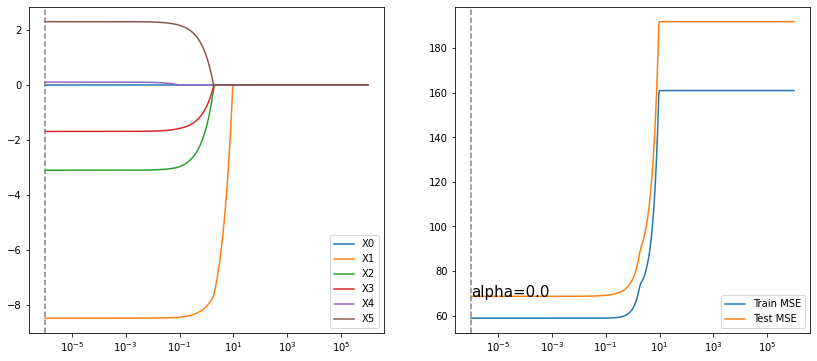

In [0]:
Lasso_output = Lasso_Reg(Phi_train, Y_train, Phi_test, Y_test, alphas, fig=True)

Ridge가 완만하게 계수를 조진다면, Lasso는 화끈하게 쳐내버리는 것을 볼 수 있다.

### 3) k-fold CV for $\lambda$

sklearn에서 kfold 함수는 데이터를 k개의 train-test split으로 나누는 __index를 뱉는다__. 즉 인덱스만 뱉어주므로 직접 그 인덱스가지고 데이터에서 뽑아내는 것은 직접 해야하는 것. 때문에 미리 데이터를 준비하고, Ridge든 뭐든 자체적으로 만든 함수도 준비해서, for 구문 안에서 끝나도록 해보자.

In [0]:
import numpy as np
from sklearn.model_selection import KFold

kcv = KFold(n_splits=5, shuffle=True)

kcvMSE_Ridge = np.zeros((kcv.get_n_splits(), alphas.size))
kcvMSE_Lasso = np.zeros((kcv.get_n_splits(), alphas.size))

i = 0
for train_index, test_index in kcv.split(Phi_train, Y_train):
    print("TRAIN:", train_index.shape, "TEST:", test_index.shape)
    CV_Phi_train, CV_Phi_test = Phi_train[train_index,:], Phi_train[test_index,:]
    CV_Y_train, CV_Y_test = Y_train.iloc[train_index], Y_train.iloc[test_index]
    
    Ridge_output = Ridge_Reg(CV_Phi_train, CV_Y_train, CV_Phi_test, CV_Y_test, alphas, fig=False)
    kcvMSE_Ridge[i, :] = Ridge_output['test_MSE']
    
    Lasso_output = Lasso_Reg(CV_Phi_train, CV_Y_train, CV_Phi_test, CV_Y_test, alphas, fig=False)
    kcvMSE_Lasso[i, :] = Lasso_output['test_MSE']
    i += 1

TRAIN: (231,) TEST: (58,)
TRAIN: (231,) TEST: (58,)
TRAIN: (231,) TEST: (58,)
TRAIN: (231,) TEST: (58,)
TRAIN: (232,) TEST: (57,)


In [0]:
fig, ax= plt.subplots(figsize=(10,6))
meanMSE = np.apply_along_axis(np.mean, 1, kcvMSE_Ridge.T)
ax.plot(alphas, kcvMSE_Ridge.T, linestyle='--')
ax.plot(alphas, meanMSE, color='black', label='Average MSE')
ax.set_xscale('log')
ax.axvline(x=alphas[np.argmin(meanMSE)], linestyle='--', color='black')
alpha = np.around(alphas[np.argmin(meanMSE)],3)
ax.text(alphas[np.argmin(meanMSE)], np.amin(meanMSE), 'alpha={0}'.format(alpha), size=15)
ax.set_title('Ridge Complexity')
ax.legend()

coefs = Ridge_output['coefs']
print("Weight:" ,coefs[np.argmin(meanMSE)])
Ridge_alphas = [alphas[np.argmin(meanMSE)]]

[4.845858644816491]

Weight: [ 0.    -8.651 -3.055 -1.576  0.     2.408]


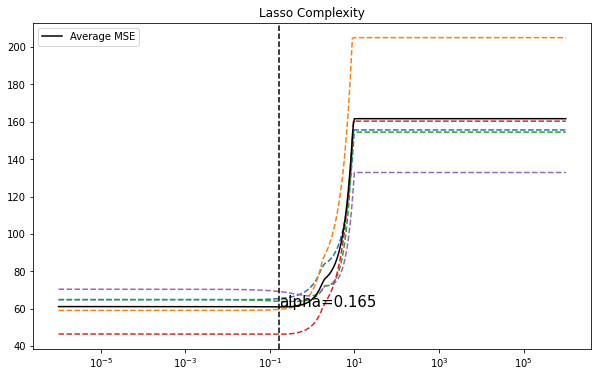

In [0]:
fig, ax= plt.subplots(figsize=(10,6))
meanMSE = np.apply_along_axis(np.mean, 1, kcvMSE_Lasso.T)
ax.plot(alphas, kcvMSE_Lasso.T, linestyle='--')
ax.plot(alphas, meanMSE, color='black', label='Average MSE')
ax.set_xscale('log')
ax.axvline(x=alphas[np.argmin(meanMSE)], linestyle='--', color='black')
alpha = np.around(alphas[np.argmin(meanMSE)],3)
ax.text(alphas[np.argmin(meanMSE)], np.amin(meanMSE), 'alpha={0}'.format(alpha), size=15)
ax.set_title('Lasso Complexity')
ax.legend()

coefs = Lasso_output['coefs']
print("Weight:" ,coefs[np.argmin(meanMSE)])
Lasso_alphas = [alphas[np.argmin(meanMSE)]]

## 5. Compare Test MSE



In [0]:
#polynomaila basis 
print("coef :" , PRmodel['coef'])
print("test MSE :",PRmodel['test_MSE'])

coef : [36.557 -8.486 -3.106 -1.695  0.099  2.298]
test MSE : 8.28342086222719


In [0]:
Ridge_output = Ridge_Reg(Phi_train, Y_train, Phi_test, Y_test, Ridge_alphas, fig=False)
print("alpha :", Ridge_alphas)
print("coef :" , Ridge_output['coefs'])
print("test_MSE :", Ridge_output['test_MSE'])

alpha : [4.845858644816491]
coef : [array([ 0.   , -8.347, -3.049, -1.672,  0.125,  2.295])]
test_MSE : [69.26822251808412]


In [0]:
Lasso_output = Lasso_Reg(Phi_train, Y_train, Phi_test, Y_test, Lasso_alphas, fig=False)
print("alpha :", Lasso_alphas)
print("coef :" , Lasso_output['coefs'])
print("test_MSE :", Lasso_output['test_MSE'])

alpha : [0.16536244070941822]
coef : [[array([ 0.   , -8.423, -2.87 , -1.526,  0.   ,  2.082])]]
test_MSE : [69.4238454647565]


## (Not yet) Appendix) Map visualization

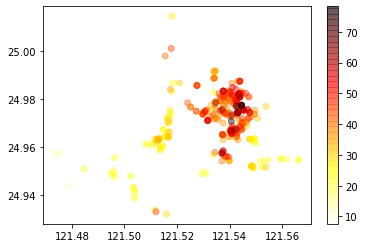

In [0]:
fig, ax = plt.subplots()
scatter = ax.scatter(real.long, real.lat, 
            c=real.price, cmap='hot_r', alpha=0.4)
fig.colorbar(scatter)

뭔가 밋밋한데...

**Geopanda로 shapefile불러와 지도 그리기!**

필요한 모듈: geopandas, shapely, descartes. 아나콘다에서 쉽게 설치할 수 있음

이런거 다 어디서 배워요? 갓구글 진리의 구글 구글 갓갓갓갓

In [0]:
# https://medium.com/@ianforrest11/graphing-latitudes-and-longitudes-on-a-map-bf64d5fca391
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

ModuleNotFoundError: ignored

대만 지도 데이터(shp)는 구글링하면 나오지만 제대로 된거는 돈을 내야 하는 것 같다.

__(주의: shp 파일을 불러올때는 압축파일 안에 있는 다른 shx 따위등등도 그 경로 안에 같이 있어야한다! 안 그러면 못찾겠다고 에러 뜬다!)__

In [0]:
# https://mapcruzin.com/free-taiwan-country-city-place-gis-shapefiles.htm
geo0_map = gpd.read_file(r'C:\Users\Hun\Desktop\roads\roads.shp')
geo1_map = gpd.read_file(r'C:\Users\Hun\Desktop\natural\natural.shp')
geo4_map = gpd.read_file(r'C:\Users\Hun\Desktop\railways\railways.shp')

뭔지 모르겠지만 이런거 해야한단다.

In [0]:
crs = {'init':'espc:4326'}
geometry = [Point(xy) for xy in zip(real.long, real.lat)]
geo_df = gpd.GeoDataFrame(real, crs= crs, geometry=geometry)

원하는 shp 레이어를 여러 개 겹쳐서 더 자세한 지도를 그릴 수 있다!

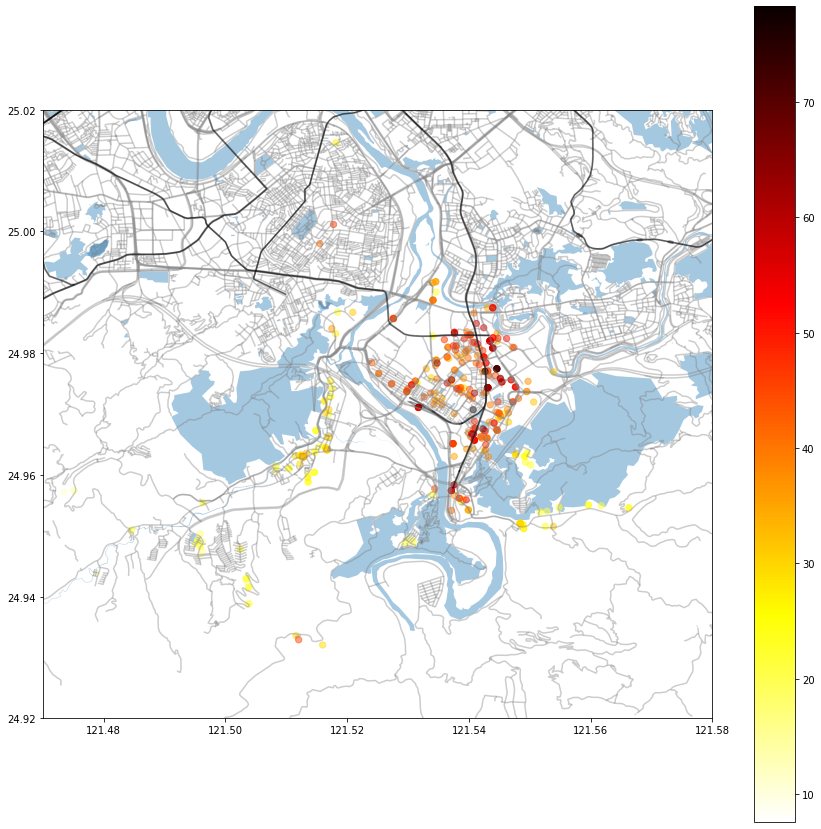

In [0]:
fig, ax = plt.subplots(figsize=(15,15))
geo0_map.plot(ax=ax, alpha=0.4, color='grey')
geo1_map.plot(ax=ax, alpha=0.4)
geo4_map.plot(ax=ax, alpha=0.4, color='black')
geo_df.plot(column='price',ax=ax,alpha=0.5, legend=True,
            markersize=40, cmap='hot_r')
plt.ylim(24.92, 25.02)
plt.xlim(121.47, 121.58)
plt.show()

역시 갓세권... 당연하겠지만 집들이 하나같이 도로변에 있는게 신기하다. 강이랑 산은 구분 없이 그냥 다 자연으로 처리된거 같다. 근데 구글 지도랑 비교해보니 이게 좀 옛날 거 같긴 하다

(캐글에 코로나 데이터 많던데 이걸로 한번 확산 지도 만들어보실 용자를 모집합니다ㅎㅎ)